# Fake and Real news

**The classification of fake news or misinformation is a very important task today. Download the fake news dataset https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset), Fake.csv and True.csv files. Load the data sets in your model development framework, examine the features to see they are text in title and text columns. Set fake as 1 and true
as 0. Concatenate to have around 44880 rows. Apply necessary pre-processing to extract title column in Tf-Idf. These are basically words and their term frequency – inverse document frequency. Use around 50 features. Make sure sanity check the pipeline and perhaps run your favorite baseline classifier first.**

df_true['class'] = 0; df_fake['class'] = 1
<br>
df = pd.concat([df_fake, df_true])
<br>
X = TfidfVectorizer(stop_words='english', max_features=40
<br>
).fit_transform(df['title'])


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

In [2]:
#Load the dataset
df_true = pd.read_csv('True.csv')
df_fake = pd.read_csv('Fake.csv')

In [3]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
list(df_true.sample(5).title)

['Nordic states step up defense cooperation because of Russia worries',
 "Australians protest against unfolding 'emergency' in offshore detention camp",
 'Finland seeks jail for men accused of planning to join Syria militant group',
 'U.S. visas to six Muslim nations drop after Supreme Court backs travel ban',
 "Juncker's proposals in sync with French agenda: presidential official"]

In [5]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
list(df_fake.sample(5).title)

[' Racist Joe Arpaio Extorts Money For Re-Election By Threatening To Retire (SCREENSHOTS)',
 ' WATCH: Conservative ‘Christian’ Leader Says Women Should Be Banned From Being Leaders',
 ' The Panama Papers: How The 1%’s Greed Has Literally Been Killing Millions Of People (VIDEO)',
 ' People Who Read This Wildly Popular Book Are Some Of The Biggest Trump Haters',
 ' Donald Trump Proves He Hates Women, Calls Reporter The C-Word (VIDEO)']

In [7]:
# Add a 'class' column to indicate fake (1) or true (0)
df_true['class'] = 0
df_fake['class'] = 1

In [8]:
# Concatenate the datasets
df = pd.concat([df_fake, df_true], ignore_index=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [10]:
df['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

### Preprocessing

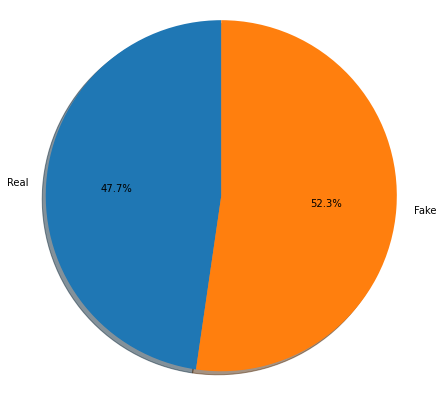

In [11]:
fig = plt.figure(figsize=(7, 7))
labels = 'Real', 'Fake'
sizes = [len(df_true), len(df_fake)] 

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')  

plt.show()

A pie chart illustrating distribution of real and fake news. It's evident that we have a higher proportion of fake news compared to real news, although the margin is not substantial.

Apply TF-IDF vectorization to the 'title' column and check the dimensions of TF-IDF matrix and examine the class istribution

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=50)
X = tfidf_vectorizer.fit_transform(df['title'])
y = df['class']

In [13]:
print(X.shape)  # Check the shape of the TF-IDF matrix
print(df['class'].value_counts())  # Check class distribution

(44898, 50)
1    23481
0    21417
Name: class, dtype: int64


Now proceed with implementing a simple classification algorithm using the TF-IDF features we have extracted from the fake news dataset. We'll use a popular classifier Logistic Regression for this example.

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialize and train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [16]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8048997772828508
Confusion Matrix:
[[3962  285]
 [1467 3266]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82      4247
           1       0.92      0.69      0.79      4733

    accuracy                           0.80      8980
   macro avg       0.82      0.81      0.80      8980
weighted avg       0.83      0.80      0.80      8980



**1. By using three classifiers, decision tree, random forest and neural network and at least 2 different hyper-parameter settings for each, generate operating points (via cross validation, mean FPR and mean TPR) and plot them on a ROC. Do not hesitate to 
use/modify the ROC plot code in the module notebook. In case you do not see enough variety in Pd-Pf you might need to work on the classifiers set and/or hyper parameters. And do not hesitate to try hundreds, if necessary, since the ROC is just a natural scatter plot.(Recommended parameters and ranges: depth [3-12], number of features [3-20], number of estimators [20-100], layer size [1-10], learning rate; and total of 10-20 OPs)**

In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

### Decision Tree

Test Acc   Max Depth    TPR    FPR   ROC AUC
   0.665           3  0.672  0.500 ROC AUC: 0.675
   0.687           5  0.692  0.500 ROC AUC: 0.695
   0.709           7  0.714  0.500 ROC AUC: 0.717
   0.730           9  0.733  0.500 ROC AUC: 0.736
   0.744          12  0.747  0.500 ROC AUC: 0.750


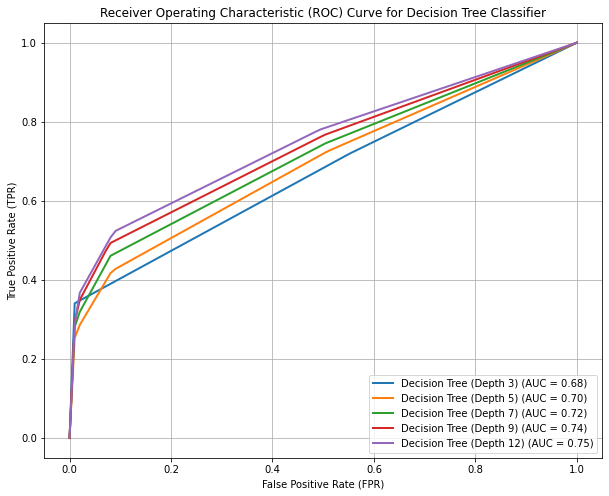

In [18]:
# Display OP
def annot(opi, _x, _y):
    plt.annotate(f"OP{opi}", xy=(_x, _y), xytext=(.90*_x+.1, .80*_y), arrowprops=dict(facecolor='lightgray', shrink=1))

# Extract text data (title) and labels
X = df['title'].values
y = df['class'].values

# Define cross-validation
cv = StratifiedKFold(n_splits=5)

# Parameters to vary for Decision Tree Classifier
max_depths = [3, 5, 7, 9, 12]

# Create a figure for ROC plot
plt.figure(figsize=(10, 8))

print(f'{"Test Acc":>8s} {"Max Depth":>11s} {"TPR":>6s} {"FPR":>6s} {"ROC AUC":>9s}')

for depth in max_depths:
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = 0
    roc_auc_values = []
    
    tprs = []
    aucs = []
    accuracies = []
    for train, test in cv.split(X, y):
        # Define the Decision Tree Classifier within a pipeline
        pipe_dt = make_pipeline(
            TfidfVectorizer(stop_words='english', max_features=50),  # TF-IDF text vectorization
            DecisionTreeClassifier(max_depth=depth, random_state=14)
        )

        pipe_dt.fit(X[train], y[train])
        y_pred = pipe_dt.predict(X[test])
        
        fpr, tpr, _ = roc_curve(y[test], y_pred)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        accuracy = accuracy_score(y[test], y_pred)
        accuracies.append(accuracy)
    
    # Calculate mean ROC curve and AUC
    mean_tpr += np.mean(tprs, axis=0)
    roc_auc_values.append(np.mean(aucs))

    # Sort the points to display nicely on ROC
    mean_fpr, mean_tpr = zip(*sorted(zip(mean_fpr, mean_tpr)))

    # Plot the ROC curve for the current depth
    plt.plot(mean_fpr, mean_tpr, lw=2, label=f'Decision Tree (Depth {depth}) (AUC = {np.mean(roc_auc_values):.2f})')

    # Print results
    print(f'{np.mean(accuracies):8.3f} {depth:11} {np.mean(mean_tpr):6.3f} {np.mean(mean_fpr):6.3f} ROC AUC: {np.mean(roc_auc_values):.3f}')

# Set labels and legend for ROC plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Classifier')
plt.legend(loc='lower right')

# Show the ROC plot
plt.grid()
plt.show()


Test Acc   Max Depth    TPR    FPR   ROC AUC
   0.746          20  0.514  0.344 ROC AUC: 0.756
   0.662          20  0.582  0.477 ROC AUC: 0.658
   0.839          20  0.595  0.367 ROC AUC: 0.841
   0.837          20  0.571  0.343 ROC AUC: 0.843
   0.763          20  0.523  0.342 ROC AUC: 0.772


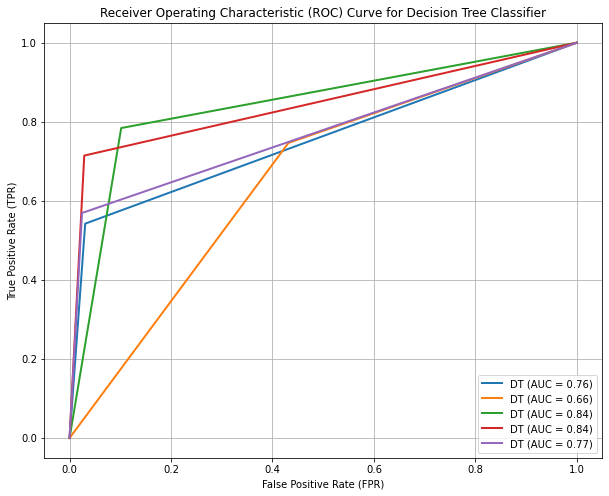

In [19]:
from sklearn.model_selection import GridSearchCV

# Define a wider range of hyperparameter values to search
param_grid = {
    'decisiontreeclassifier__max_depth': [3, 5, 7, 9, 12, 15, 20],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
}

# Create a figure for ROC plot
plt.figure(figsize=(10, 8))

print(f'{"Test Acc":>8s} {"Max Depth":>11s} {"TPR":>6s} {"FPR":>6s} {"ROC AUC":>9s}')

for train, test in cv.split(X, y):
    # Define the Decision Tree Classifier within a pipeline
    pipe_dt = make_pipeline(
        TfidfVectorizer(stop_words='english', max_features=50),  # TF-IDF text vectorization
        DecisionTreeClassifier(random_state=14)
    )

    # Perform grid search for hyperparameter tuning
    dt_grid = GridSearchCV(pipe_dt, param_grid, cv=3, scoring='roc_auc')
    dt_grid.fit(X[train], y[train])
    
    # Get the best hyperparameters
    best_max_depth = dt_grid.best_params_['decisiontreeclassifier__max_depth']
    best_min_samples_split = dt_grid.best_params_['decisiontreeclassifier__min_samples_split']
    best_min_samples_leaf = dt_grid.best_params_['decisiontreeclassifier__min_samples_leaf']

    # Fit the model with the best hyperparameters
    pipe_dt = make_pipeline(
        TfidfVectorizer(stop_words='english', max_features=50),  # TF-IDF text vectorization
        DecisionTreeClassifier(
            max_depth=best_max_depth,
            min_samples_split=best_min_samples_split,
            min_samples_leaf=best_min_samples_leaf,
            random_state=14
        )
    )
    pipe_dt.fit(X[train], y[train])
    y_pred = pipe_dt.predict(X[test])
    
    fpr, tpr, _ = roc_curve(y[test], y_pred)
    roc_auc = auc(fpr, tpr)
    
    accuracy = accuracy_score(y[test], y_pred)

    # Sort the points to display nicely on ROC
    fpr, tpr = zip(*sorted(zip(fpr, tpr)))

    # Plot the ROC curve for the current fold
    plt.plot(fpr, tpr, lw=2, label=f'DT (AUC = {roc_auc:.2f})')

    # Print results
    print(f'{accuracy:8.3f} {best_max_depth:11} {np.mean(tpr):6.3f} {np.mean(fpr):6.3f} ROC AUC: {roc_auc:.3f}')

# Set labels and legend for ROC plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree Classifier')
plt.legend(loc='lower right')

# Show the ROC plot
plt.grid()
plt.show()


 ### Random Forest

Test Acc           Classifier    TPR    FPR   ROC AUC
   0.777 Random Forest         0.778  0.500 ROC AUC: 0.781
   0.778 Random Forest         0.779  0.500 ROC AUC: 0.782
   0.777 Random Forest         0.778  0.500 ROC AUC: 0.781
   0.777 Random Forest         0.778  0.500 ROC AUC: 0.781
   0.777 Random Forest         0.778  0.500 ROC AUC: 0.781
   0.778 Random Forest         0.779  0.500 ROC AUC: 0.782
   0.777 Random Forest         0.778  0.500 ROC AUC: 0.781
   0.777 Random Forest         0.778  0.500 ROC AUC: 0.781
   0.778 Random Forest         0.779  0.500 ROC AUC: 0.782
   0.779 Random Forest         0.779  0.500 ROC AUC: 0.782
   0.778 Random Forest         0.779  0.500 ROC AUC: 0.782
   0.778 Random Forest         0.779  0.500 ROC AUC: 0.781


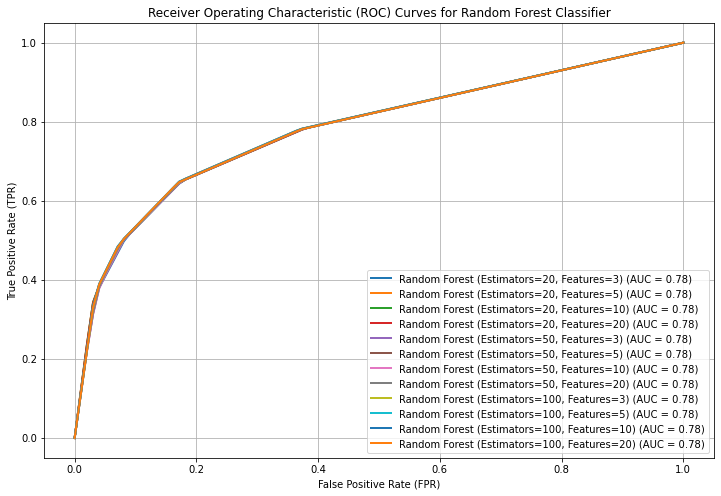

In [20]:
# Parameters to vary for Random Forest Classifier
n_estimators_list = [20, 50, 100]
max_features_list = [3, 5, 10, 20]

# Create a figure for ROC plot
plt.figure(figsize=(12, 8))

print(f'{"Test Acc":>8s} {"Classifier":>20s} {"TPR":>6s} {"FPR":>6s} {"ROC AUC":>9s}')

for n_estimators in n_estimators_list:
    for max_features in max_features_list:
        mean_fpr = np.linspace(0, 1, 100)
        mean_tpr = 0
        roc_auc_values = []

        tprs = []
        aucs = []
        accuracies = []

        for train, test in cv.split(X, y):
            # Define the Random Forest Classifier within a pipeline
            clf = make_pipeline(
                TfidfVectorizer(stop_words='english', max_features=50),  # TF-IDF text vectorization
                RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, random_state=14)
            )

            clf.fit(X[train], y[train])
            y_pred = clf.predict(X[test])

            fpr, tpr, _ = roc_curve(y[test], y_pred)
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
            tprs.append(np.interp(mean_fpr, fpr, tpr))
            accuracy = accuracy_score(y[test], y_pred)
            accuracies.append(accuracy)

        # Calculate mean ROC curve and AUC
        mean_tpr += np.mean(tprs, axis=0)
        roc_auc_values.append(np.mean(aucs))

        # Sort the points to display nicely on ROC
        mean_fpr, mean_tpr = zip(*sorted(zip(mean_fpr, mean_tpr)))

        # Get classifier name
        clf_name = "Random Forest"

        # Plot the ROC curve for the current classifier and parameters
        plt.plot(mean_fpr, mean_tpr, lw=2, label=f'{clf_name} (Estimators={n_estimators}, Features={max_features}) (AUC = {np.mean(roc_auc_values):.2f})')

        # Print results
        print(f'{np.mean(accuracies):8.3f} {clf_name:20} {np.mean(mean_tpr):6.3f} {np.mean(mean_fpr):6.3f} ROC AUC: {np.mean(roc_auc_values):.3f}')

# Set labels and legend for ROC plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves for Random Forest Classifier')
plt.legend(loc='lower right')

# Show the ROC plot
plt.grid()
plt.show()


Test Acc           Classifier    TPR    FPR   ROC AUC
   0.731 Random Forest         0.735  0.500 ROC AUC: 0.738
   0.755 Random Forest         0.758  0.500 ROC AUC: 0.761
   0.765 Random Forest         0.768  0.500 ROC AUC: 0.771
   0.731 Random Forest         0.735  0.500 ROC AUC: 0.738
   0.755 Random Forest         0.758  0.500 ROC AUC: 0.761
   0.768 Random Forest         0.770  0.500 ROC AUC: 0.773
   0.741 Random Forest         0.744  0.500 ROC AUC: 0.747
   0.757 Random Forest         0.760  0.500 ROC AUC: 0.762
   0.767 Random Forest         0.769  0.500 ROC AUC: 0.772


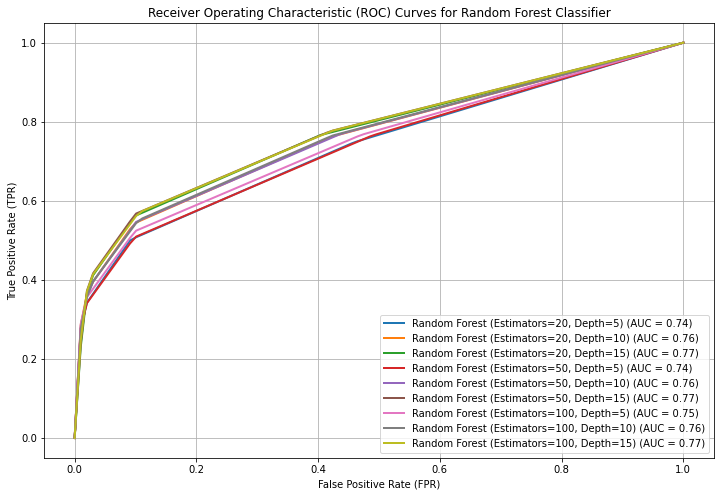

In [21]:
# Parameters to vary for Random Forest Classifier
n_estimators_list = [20, 50, 100]
max_depth_list = [5, 10, 15]

# Create a figure for ROC plot
plt.figure(figsize=(12, 8))

print(f'{"Test Acc":>8s} {"Classifier":>20s} {"TPR":>6s} {"FPR":>6s} {"ROC AUC":>9s}')

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        mean_fpr = np.linspace(0, 1, 100)
        mean_tpr = 0
        roc_auc_values = []

        tprs = []
        aucs = []
        accuracies = []

        for train, test in cv.split(X, y):
            # Define the Random Forest Classifier within a pipeline
            clf = make_pipeline(
                TfidfVectorizer(stop_words='english', max_features=50),  # TF-IDF text vectorization
                RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=14)
            )

            clf.fit(X[train], y[train])
            y_pred = clf.predict(X[test])

            fpr, tpr, _ = roc_curve(y[test], y_pred)
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
            tprs.append(np.interp(mean_fpr, fpr, tpr))
            accuracy = accuracy_score(y[test], y_pred)
            accuracies.append(accuracy)

        # Calculate mean ROC curve and AUC
        mean_tpr += np.mean(tprs, axis=0)
        roc_auc_values.append(np.mean(aucs))

        # Sort the points to display nicely on ROC
        mean_fpr, mean_tpr = zip(*sorted(zip(mean_fpr, mean_tpr)))

        # Get classifier name
        clf_name = "Random Forest"

        # Plot the ROC curve for the current classifier and parameters
        plt.plot(mean_fpr, mean_tpr, lw=2, label=f'{clf_name} (Estimators={n_estimators}, Depth={max_depth}) (AUC = {np.mean(roc_auc_values):.2f})')

        # Print results
        print(f'{np.mean(accuracies):8.3f} {clf_name:20} {np.mean(mean_tpr):6.3f} {np.mean(mean_fpr):6.3f} ROC AUC: {np.mean(roc_auc_values):.3f}')

# Set labels and legend for ROC plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves for Random Forest Classifier')
plt.legend(loc='lower right')

# Show the ROC plot
plt.grid()
plt.show()

### Neural Network

Test Acc           Classifier    TPR    FPR   ROC AUC
   0.776 Neural Network        0.777  0.500 ROC AUC: 0.780
   0.779 Neural Network        0.780  0.500 ROC AUC: 0.783
   0.772 Neural Network        0.773  0.500 ROC AUC: 0.776


C:\Users\bayar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


   0.777 Neural Network        0.778  0.500 ROC AUC: 0.780
   0.775 Neural Network        0.776  0.500 ROC AUC: 0.779
   0.781 Neural Network        0.782  0.500 ROC AUC: 0.785


C:\Users\bayar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bayar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


   0.776 Neural Network        0.777  0.500 ROC AUC: 0.780
   0.778 Neural Network        0.779  0.500 ROC AUC: 0.781
   0.775 Neural Network        0.776  0.500 ROC AUC: 0.779


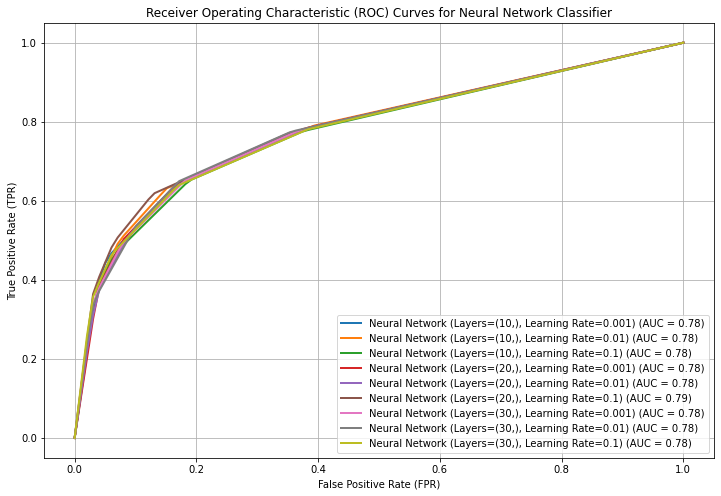

In [22]:
# Parameters to vary for Neural Network Classifier
hidden_layer_sizes_list = [(10,), (20,), (30,)]
learning_rate_init_list = [0.001, 0.01, 0.1]

# Create a figure for ROC plot
plt.figure(figsize=(12, 8))

print(f'{"Test Acc":>8s} {"Classifier":>20s} {"TPR":>6s} {"FPR":>6s} {"ROC AUC":>9s}')

for hidden_layer_sizes in hidden_layer_sizes_list:
    for learning_rate_init in learning_rate_init_list:
        mean_fpr = np.linspace(0, 1, 100)
        mean_tpr = 0
        roc_auc_values = []

        tprs = []
        aucs = []
        accuracies = []

        for train, test in cv.split(X, y):
            # Define the Neural Network Classifier within a pipeline
            clf = make_pipeline(
                TfidfVectorizer(stop_words='english', max_features=50),  # TF-IDF text vectorization
                MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate_init, random_state=14)
            )

            clf.fit(X[train], y[train])
            y_pred = clf.predict(X[test])

            fpr, tpr, _ = roc_curve(y[test], y_pred)
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
            tprs.append(np.interp(mean_fpr, fpr, tpr))
            accuracy = accuracy_score(y[test], y_pred)
            accuracies.append(accuracy)

        # Calculate mean ROC curve and AUC
        mean_tpr += np.mean(tprs, axis=0)
        roc_auc_values.append(np.mean(aucs))

        # Sort the points to display nicely on ROC
        mean_fpr, mean_tpr = zip(*sorted(zip(mean_fpr, mean_tpr)))

        # Get classifier name
        clf_name = "Neural Network"

        # Plot the ROC curve for the current classifier and parameters
        plt.plot(mean_fpr, mean_tpr, lw=2, label=f'{clf_name} (Layers={hidden_layer_sizes}, Learning Rate={learning_rate_init}) (AUC = {np.mean(roc_auc_values):.2f})')

        # Print results
        print(f'{np.mean(accuracies):8.3f} {clf_name:20} {np.mean(mean_tpr):6.3f} {np.mean(mean_fpr):6.3f} ROC AUC: {np.mean(roc_auc_values):.3f}')

# Set labels and legend for ROC plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves for Neural Network Classifier')
plt.legend(loc='lower right')

# Show the ROC plot
plt.grid()
plt.show()

Test Acc        Hidden Layers   Learning Rate    TPR    FPR   ROC AUC
   0.776 Neural Network       (5,)      0.001  0.777  0.500 ROC AUC: 0.780
   0.776 Neural Network       (5,)       0.01  0.778  0.500 ROC AUC: 0.781
   0.779 Neural Network       (5,)        0.1  0.780  0.500 ROC AUC: 0.783
   0.776 Neural Network       (10,)      0.001  0.777  0.500 ROC AUC: 0.780
   0.779 Neural Network       (10,)       0.01  0.780  0.500 ROC AUC: 0.783
   0.772 Neural Network       (10,)        0.1  0.773  0.500 ROC AUC: 0.776


C:\Users\bayar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


   0.777 Neural Network       (15,)      0.001  0.778  0.500 ROC AUC: 0.781
   0.777 Neural Network       (15,)       0.01  0.778  0.500 ROC AUC: 0.781
   0.795 Neural Network       (15,)        0.1  0.797  0.500 ROC AUC: 0.800


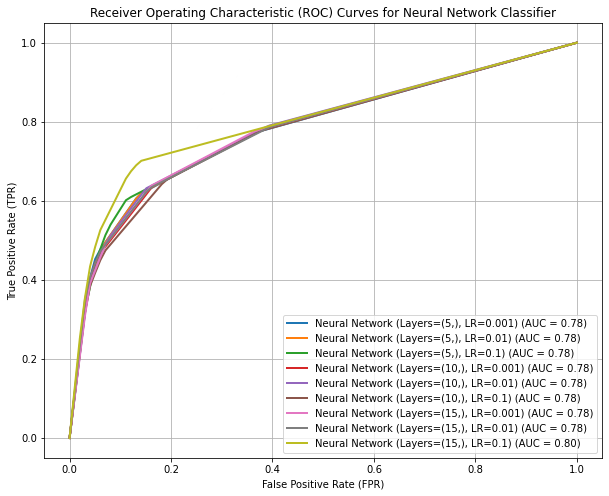

In [23]:
# Parameters to vary for Neural Network Classifier
hidden_layer_sizes_list = [(5,), (10,), (15,)]
learning_rates = [0.001, 0.01, 0.1]

# Create a figure for ROC plot
plt.figure(figsize=(10, 8))

print(f'{"Test Acc":>8s} {"Hidden Layers":>20s} {"Learning Rate":>15s} {"TPR":>6s} {"FPR":>6s} {"ROC AUC":>9s}')

for hidden_layer_sizes in hidden_layer_sizes_list:
    for learning_rate in learning_rates:
        mean_fpr = np.linspace(0, 1, 100)
        mean_tpr = 0
        roc_auc_values = []

        tprs = []
        aucs = []
        accuracies = []

        for train, test in cv.split(X, y):
            # Define the Neural Network Classifier within a pipeline
            pipe_nn = make_pipeline(
                TfidfVectorizer(stop_words='english', max_features=50),  # TF-IDF text vectorization
                MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, learning_rate_init=learning_rate, random_state=14)
            )

            pipe_nn.fit(X[train], y[train])
            y_pred = pipe_nn.predict(X[test])

            fpr, tpr, _ = roc_curve(y[test], y_pred)
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)
            tprs.append(np.interp(mean_fpr, fpr, tpr))
            accuracy = accuracy_score(y[test], y_pred)
            accuracies.append(accuracy)

        # Calculate mean ROC curve and AUC
        mean_tpr += np.mean(tprs, axis=0)
        roc_auc_values.append(np.mean(aucs))

        # Sort the points to display nicely on ROC
        mean_fpr, mean_tpr = zip(*sorted(zip(mean_fpr, mean_tpr)))

        # Get classifier name
        clf_name = "Neural Network"

        # Plot the ROC curve for the current classifier and parameters
        plt.plot(mean_fpr, mean_tpr, lw=2, label=f'{clf_name} (Layers={hidden_layer_sizes}, LR={learning_rate}) (AUC = {np.mean(roc_auc_values):.2f})')

        # Print results
        print(f'{np.mean(accuracies):8.3f} {clf_name:20} {hidden_layer_sizes} {learning_rate:>10} {np.mean(mean_tpr):6.3f} {np.mean(mean_fpr):6.3f} ROC AUC: {np.mean(roc_auc_values):.3f}')

# Set labels and legend for ROC plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves for Neural Network Classifier')
plt.legend(loc='lower right')

# Show the ROC plot
plt.grid()
plt.show()